In [57]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# TASK 1

In [58]:
#Loading the dataset using pandas.
data=load_iris()

In [59]:
data= pd.DataFrame(data.data, columns=data.feature_names)

In [60]:
#Explore the structure of the dataset by checking the data types and any missing values.
# Check for missing values in each column
print(data.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [61]:
# Or to see if the whole dataset has any missing values at all
print(data.isnull().values.any())

False


In [62]:
# For total count of missing values
print(data.isnull().sum().sum())

0


#### No missing data in the iris dataset

In [63]:
#Display the first few rows of the dataset using .head() to inspect the data.
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# TASK 2

In [65]:
#Compute the basic statistics of the numerical columns (e.g., mean, median, standard deviation) using .describe().
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [66]:
#Perform groupings on a categorical column (for example, species, region, or department) and compute the mean of a numerical column for each group.
# Group by species and compute mean of numerical columns
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
data = pd.read_csv(url)
grouped_means = data.groupby("species").mean(numeric_only=True)

print(grouped_means)

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


In [67]:
data.groupby("species")["petal_length"].mean()

species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

# TASK 3 VISUALIZATION 

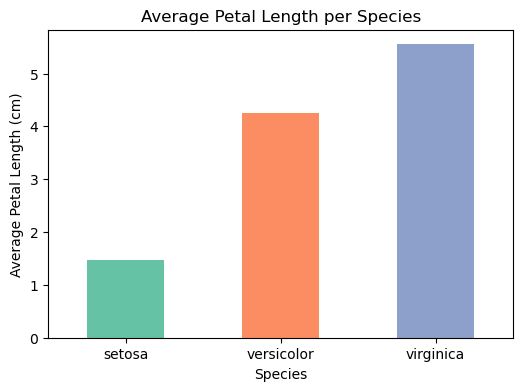

In [71]:
# BAR CHART
# Group by species and calculate average petal length

avg_petal_length = data.groupby("species")["petal_length"].mean()

# Plot bar chart
plt.figure(figsize=(6,4))
avg_petal_length.plot(kind="bar", color=["#66c2a5", "#fc8d62", "#8da0cb"])

plt.title("Average Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Average Petal Length (cm)")
plt.xticks(rotation=0)
plt.show()

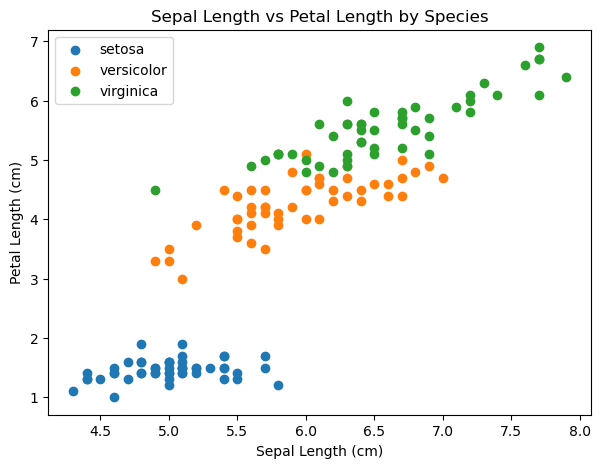

In [69]:
# Scatter plot: Sepal Length vs Petal Length
plt.figure(figsize=(7,5))
for species in data["species"].unique():
    subset = data[data["species"] == species]
    plt.scatter(subset["sepal_length"], subset["petal_length"], label=species)

plt.title("Sepal Length vs Petal Length by Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend()
plt.show()

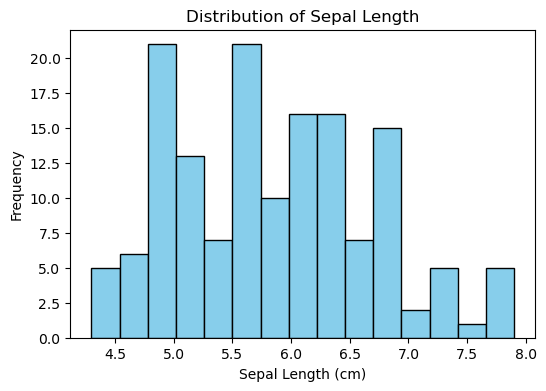

In [72]:
# Histogram of sepal length
plt.figure(figsize=(6,4))
plt.hist(data["sepal_length"], bins=15, color="skyblue", edgecolor="black")

plt.title("Distribution of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()